In [10]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
class Value():
    # initialisation
    def __init__(self, data, _childern=(), label='', _op=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
    
    # addition operation
    def __add__(self, other):
        if (not isinstance(other, Value)):
            other = Value(other)
        retdata = self.data + other.data
        ret = Value(retdata)
        
        def _backward():
            self.grad += 1.0 * ret.grad
            other.grad += 1.0 * ret.grad
        ret._backward = _backward
        return ret
    
    # multiplication operation
    def __mul__(self, other):
        if (not isinstance(other, Value)):
            other = Value(other)
        retdata = self.data * other.data
        ret = Value(retdata)
        
        def _backward():
            self.grad += other.data * ret.grad
            other.grad += self.data * ret.grad
        ret._backward = _backward
        return ret 
    
    # sigmoid activation function
    def sigmoid(self):
        x = self.data
        ret = Value(1/(1+(math.exp(-x))))
        
        def _backward():
            f = 1/(1+(math.exp(-x)))
            self.grad += (f*(1 - f)) * ret.grad
        ret._backward = _backward
        return ret
    
    def __rmul__(self, other): # other * self
        return self * other

    def __radd__(self, other): # other + self
        return self + other
        
    # string representation
    def __repr__(self):
        return f"Value(data:{self.data})"
    

In [92]:
a = Value(1.0)
b = Value(2.0)

print(a*b)

Value(data:2.0)


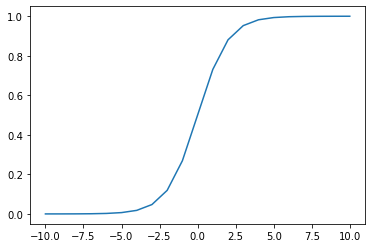

In [93]:
xaxis = np.arange(-10,11,1)
yaxis = [1/(1+(math.exp(-i))) for i in xaxis ]
plt.plot(xaxis, yaxis)

In [94]:
x = Value(5.0)

dat = x.data
func = 5*(dat**3) + 2*(dat**2) - dat - 10
funcValue = Value(func)
print(funcValue)


Value(data:660.0)


In [95]:
x.sigmoid()

Value(data:0.9933071490757153)

In [96]:
# example from Andrej Karpathy's jupyter notebook

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.sigmoid(); o.label = 'o'



In [97]:
o.grad = 1.0
o._backward()
n._backward()
x1w1x2w2._backward()
print(n.grad)
print(o.grad)
print(x1w1x2w2.grad)
print(b.grad)

0.20710678118654752
1.0
0.20710678118654752
0.20710678118654752


In [98]:
# neuralnet implementation

class Neuron():
    def __init__(self, numberOfInputs):
        self.weights = [Value(random.randint(0,9)) for _ in range(numberOfInputs)]
        self.bias = Value(random.randint(0,9))
    
    def __call__(self, inputs):
        # w.inputs + bias
        ret = sum((i*j for i, j in zip(self.weights, inputs)), self.bias.data)
        return ret.sigmoid()
    
class Layers():
    def __init__(self, numberOfInput, numberOfNeurons):
        self.layer = [Neuron(numberOfInput) for i in range(numberOfNeurons)]
        self.output = numberOfNeurons
        
    def __call__(self, inputLayer):
        ret = [self.layer[i](inputLayer) for i in range(self.output)]
        return ret

class MultiLevelPerceptron():
    def __init__(self, numberOfInputs, numberOfNeuronsInLayers):
        self.layerList = [numberOfInputs] + numberOfNeuronsInLayers
        self.layersList = [Layers(self.layerList[i], self.layerList[i+1]) for i in (range(len(self.layerList)- 1) )]
        
    # forward prop
    def __call__(self, inputLayer):
        inputs = inputLayer
        for i in self.layersList:
            print(i.output)
            inputs = i(inputs)
        return inputs
        
        
            

In [99]:
# x = Neuron(3)
# x([1,2,3])
l = MultiLevelPerceptron(3, [4,4,1])
l([1,2,3])

4
4
1


[Value(data:0.9999999999981204)]